Notebook that compares the results of our autoencodeur with the SVD.

In [141]:
from modules import SVD
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import modules.MainFunctions as MF

file_number=1

%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
cplx_cr, nFiles, Lmax = SVD.get_cr('data/AugmentedLPSpectra/')
cplx_df = pd.DataFrame(cplx_cr)

100%|████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:05<00:00, 1161.31it/s]


In [209]:
# With apply the SVD to the spectra with complex coefficents
# and the spectra with real coefficients (twice more numerous, because real part + imaginary part)
real_cr = SVD.complex_to_real_matrix(complex_cr)
real_df = pd.DataFrame(real_cr)

In [170]:
cplx_X= cplx_df.to_numpy()
np.random.shuffle(cplx_X)

cplx_train = cplx_X[:4000]
cplx_test  = cplx_X[4000:5000]
#cplx_validate = cplx_X[5000:]

real_X= real_df.to_numpy()
np.random.shuffle(real_X)

real_train = real_X[:4000]
real_test  = real_X[4000:5000]
#real_validate = real_X[5000:]

In [171]:
cplx_u,cplx_s, cplx_v = np.linalg.svd(cplx_train, full_matrices=True, compute_uv=True, hermitian=False)
real_u,real_s,real_v = np.linalg.svd(real_train, full_matrices=True, compute_uv=True, hermitian=False)

<IPython.core.display.Javascript object>


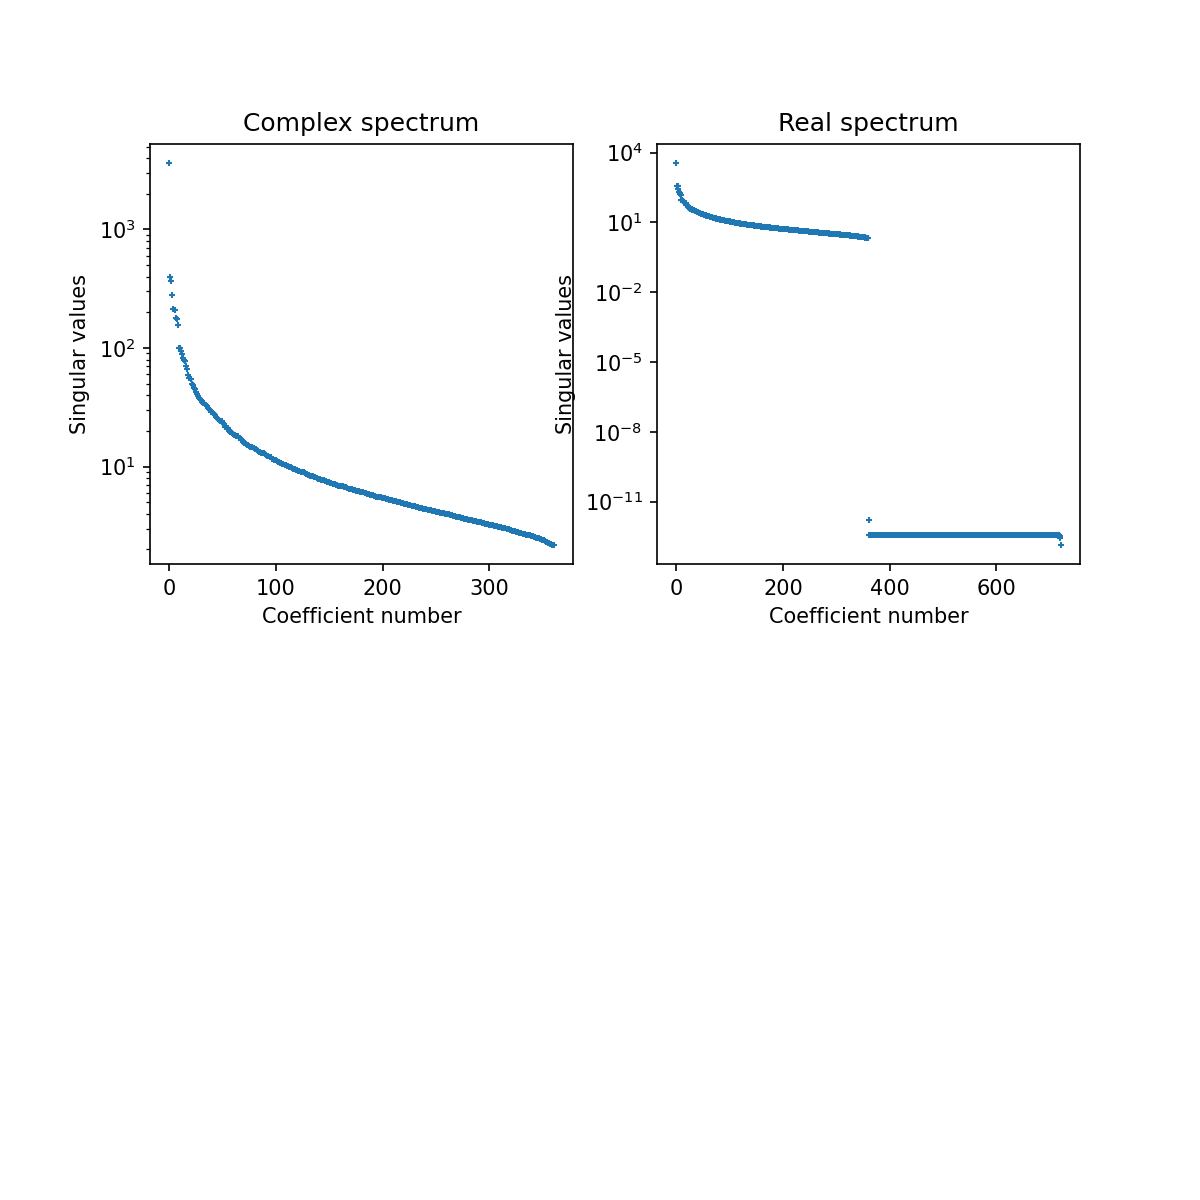

In [172]:
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.plot(complex_s,markersize=3,marker="+",linestyle="None")
plt.xlabel("Coefficient number")
plt.ylabel("Singular values")
plt.yscale("log")
plt.title("Complex spectrum")
plt.subplot(222)
plt.plot(real_s,markersize=3,marker="+",linestyle="None")
plt.xlabel("Coefficient number")
plt.ylabel("Singular values")
plt.yscale("log")
plt.title("Real spectrum")
plt.show()

In [173]:
cplx_R = cplx_test.shape[1]
cplx_err = np.zeros(cplx_R)

for rank in tqdm(range(cplx_R),desc="Work in progress"):
    cplx_pred = SVD.pred_svd(cplx_test,cplx_v,rank)
    cplx_err[rank] = np.mean(np.abs(cplx_test-cplx_pred))

real_R = real_test.shape[1]
real_err = np.zeros(real_R)

for rank in tqdm(range(real_R),desc="Work in progress"):
    real_pred = SVD.pred_svd(real_test,real_v,rank)
    real_err[rank] = np.mean(np.abs(real_test-real_pred))


Work in progress: 100%|██████████████████████████████████████████████████████████████| 722/722 [00:29<00:00, 24.75it/s]


<IPython.core.display.Javascript object>


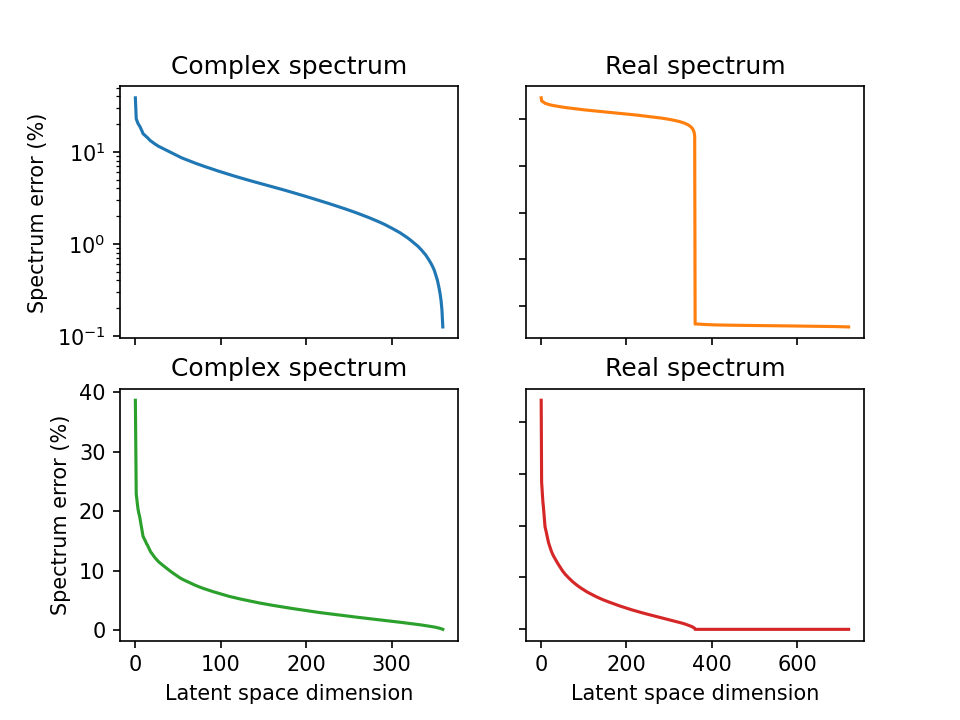

<IPython.core.display.Javascript object>


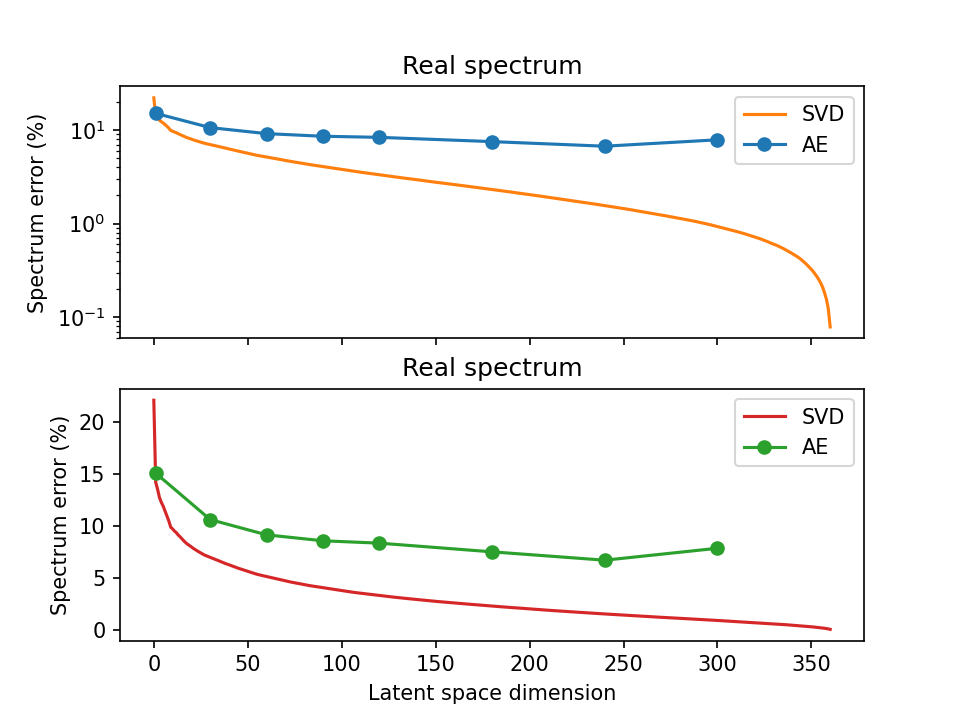

In [174]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(cplx_err*100)
axs[0, 0].set_title('Complex spectrum')
axs[0, 0].set_yscale("log")
axs[0, 1].plot(real_err*100, 'tab:orange')
axs[0, 1].set_title('Real spectrum')
axs[0, 1].set_yscale("log")
axs[1, 0].plot(cplx_err*100, 'tab:green')
axs[1, 0].set_title('Complex spectrum')
axs[1, 1].plot(real_err*100, 'tab:red')
axs[1, 1].set_title('Real spectrum')

for ax in axs.flat:
    ax.set(xlabel='Latent space dimension', ylabel='Spectrum error (%)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# AE results
X = [1,30,60,90,120,180,240,300]
Y = [15.07083426,10.61337467,9.149844903,8.577424906,8.351657738,7.517845625,6.715123417,7.860768032]
 
fig, axs = plt.subplots(2)
axs[0].plot(real_err[:361]*100, 'tab:orange', label="SVD")
axs[0].plot(X,Y, 'tab:blue', marker='o', linestyle='-',label="AE")
axs[0].set_title('Real spectrum')
axs[0].set_yscale("log")
axs[1].plot(real_err[:361]*100, 'tab:red', label="SVD")
axs[1].plot(X,Y, 'tab:green', marker='o', linestyle='-',label="AE")
axs[1].set_title('Real spectrum')


for ax in axs.flat:
    ax.set(xlabel='Latent space dimension', ylabel='Spectrum error (%)')
    ax.legend()

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [175]:
big_RY = MF.find_RY(N=46,Lmax=Lmax,verbose=False)

Loading data/precomputedRY/RY_M_100_Lmax_18_.npy


In [202]:
ranks = [1,30,60,90,120,180,240,300]

real_R = real_test.shape[1]
real_err_3D = np.zeros(real_R)

for rank in tqdm(ranks,desc="Work in progress"):
    real_pred = SVD.pred_svd(real_test,real_v,rank)
    real_err_3D[rank] = SVD.error_3D(real_test,real_pred,big_RY,N=46,barycentre=None,complex_cr=False)
err_3D = real_err_3D.copy()

Work in progress: 100%|█████████████████████████████████████████████████████████████████| 8/8 [16:15<00:00, 121.98s/it]


<IPython.core.display.Javascript object>


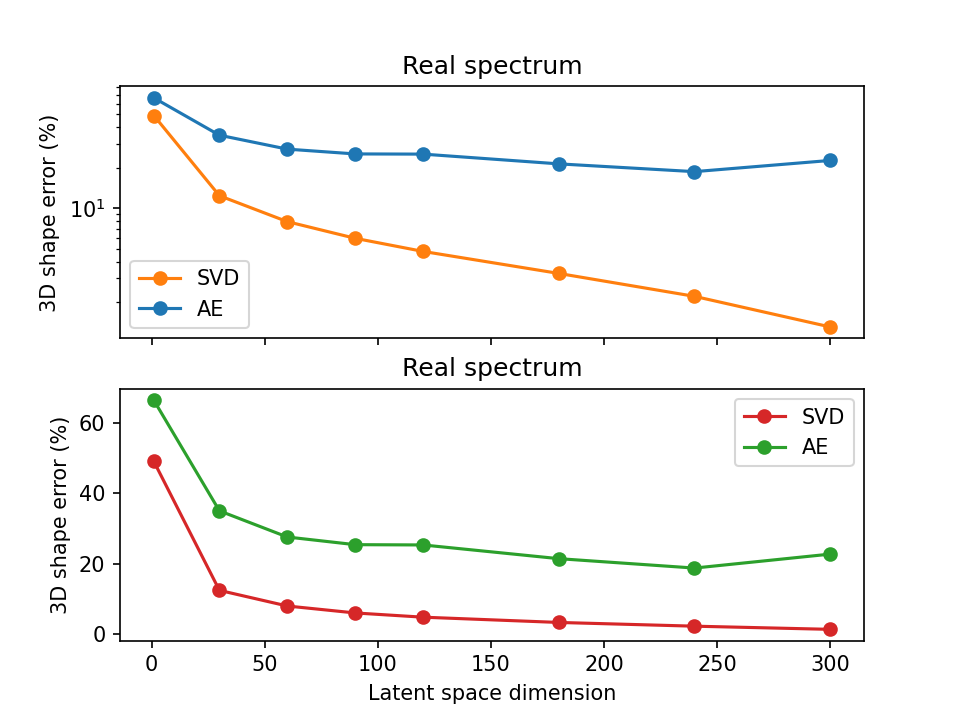

In [206]:
Ysvd = err_3D[ranks]
Yae = [66.42374253,34.98724981,27.54924019,25.3725616,25.29271554,21.39463229,18.72237294,22.68822425]

fig, axs = plt.subplots(2)
axs[0].plot(ranks,Ysvd, 'tab:orange', marker='o', linestyle='-', label="SVD")
axs[0].plot(ranks,Yae, 'tab:blue', marker='o', linestyle='-',label="AE")
axs[0].set_title('Real spectrum')
axs[0].set_yscale("log")
axs[1].plot(ranks,Ysvd, 'tab:red', marker='o', linestyle='-', label="SVD")
axs[1].plot(ranks,Yae, 'tab:green', marker='o', linestyle='-',label="AE")
axs[1].set_title('Real spectrum')

for ax in axs.flat:
    ax.set(xlabel='Latent space dimension', ylabel='3D shape error (%)')
    ax.legend()

for ax in axs.flat:
    ax.label_outer()

In [207]:
L = 12
ranks_trunc = [(l+1)**2*2 for l in range(L)]
real_err_trunc = np.zeros(L)

for l in tqdm(range(L),desc="Work in progress"):
    real_pred = SVD.truncate(real_test,l)
    real_err_trunc[l] = SVD.error_3D(real_test,real_pred,big_RY,N=46,barycentre=None,complex_cr=False)

Work in progress:   0%|                                                                         | 0/12 [00:00<?, ?it/s]

WARNING in find_RY : no corresponding Lmax in find_RY, computing RY


Work in progress:   8%|█████▍                                                           | 1/12 [01:12<13:19, 72.64s/it]

WARNING in find_RY : N > max(M) in find_R, computing RY


Work in progress:  17%|██████████▊                                                      | 2/12 [02:27<12:20, 74.07s/it]

WARNING in find_RY : no corresponding Lmax in find_RY, computing RY


Work in progress:  25%|████████████████▎                                                | 3/12 [03:45<11:22, 75.87s/it]

WARNING in find_RY : no corresponding Lmax in find_RY, computing RY


Work in progress:  33%|█████████████████████▋                                           | 4/12 [05:05<10:20, 77.50s/it]

WARNING in find_RY : N > max(M) in find_R, computing RY


Work in progress:  42%|███████████████████████████                                      | 5/12 [06:28<09:15, 79.31s/it]

Loading data/precomputedRY/RY_M_100_Lmax_5_.npy


Work in progress:  50%|████████████████████████████████▌                                | 6/12 [07:52<08:05, 80.97s/it]

WARNING in find_RY : N > max(M) in find_R, computing RY


Work in progress:  58%|█████████████████████████████████████▉                           | 7/12 [09:21<06:58, 83.75s/it]

WARNING in find_RY : no corresponding Lmax in find_RY, computing RY


Work in progress:  67%|███████████████████████████████████████████▎                     | 8/12 [10:55<05:47, 86.91s/it]

WARNING in find_RY : no corresponding Lmax in find_RY, computing RY


Work in progress:  75%|████████████████████████████████████████████████▊                | 9/12 [12:28<04:26, 88.76s/it]

Loading data/precomputedRY/RY_M_100_Lmax_9_.npy


Work in progress:  83%|█████████████████████████████████████████████████████▎          | 10/12 [13:56<02:57, 88.51s/it]

WARNING in find_RY : no corresponding Lmax in find_RY, computing RY


Work in progress:  92%|██████████████████████████████████████████████████████████▋     | 11/12 [15:40<01:33, 93.44s/it]

WARNING in find_RY : no corresponding Lmax in find_RY, computing RY


Work in progress: 100%|████████████████████████████████████████████████████████████████| 12/12 [17:34<00:00, 87.90s/it]


<IPython.core.display.Javascript object>


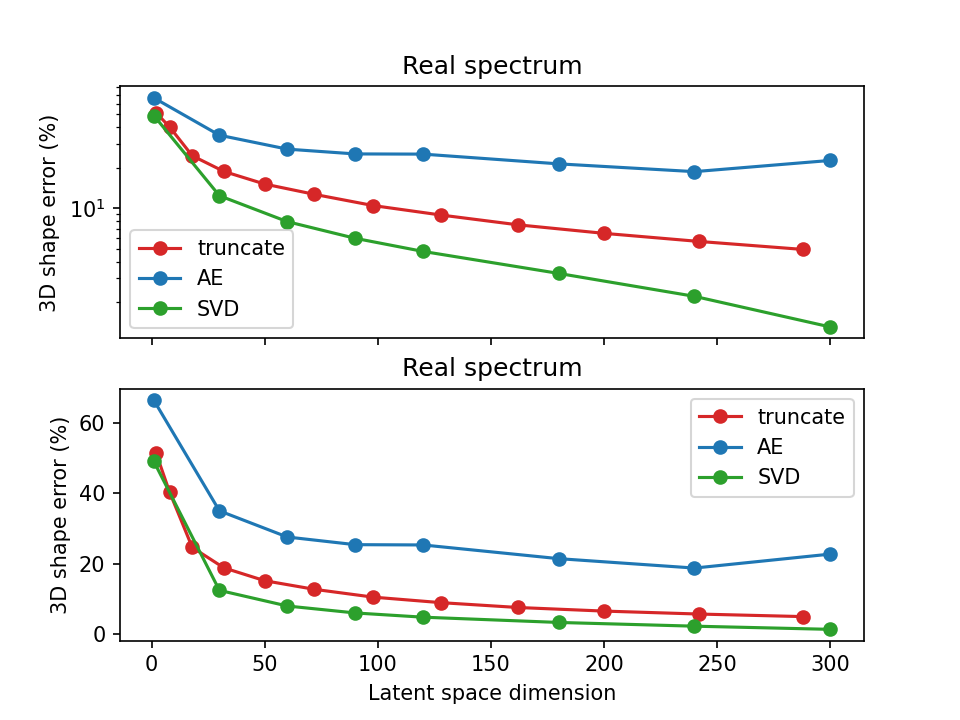

In [208]:
fig, axs = plt.subplots(2)
axs[0].plot(ranks_trunc,real_err_trunc, 'tab:red', marker='o', linestyle='-', label="truncate")
axs[0].plot(ranks,Yae, 'tab:blue', marker='o', linestyle='-',label="AE")
axs[0].plot(ranks,Ysvd, 'tab:green', marker='o', linestyle='-',label="SVD")
axs[0].set_title('Real spectrum')
axs[0].set_yscale("log")
axs[1].plot(ranks_trunc,real_err_trunc, 'tab:red', marker='o', linestyle='-', label="truncate")
axs[1].plot(ranks,Yae, 'tab:blue', marker='o', linestyle='-',label="AE")
axs[1].plot(ranks,Ysvd, 'tab:green', marker='o', linestyle='-',label="SVD")
axs[1].set_title('Real spectrum')

for ax in axs.flat:
    ax.set(xlabel='Latent space dimension', ylabel='3D shape error (%)')
    ax.legend()

for ax in axs.flat:
    ax.label_outer()